# Приближенное решение уравнения ${f(x) = 0}$ методом деления отрезка пополам 

## Описание метода

Для работы метода нам нужно знать отрезок [a, b], такой что выполняется теорема Больцано-Коши ($f(a) * f(b) < 0$). В таком случае на этом отрезке $\exists c: f(c) = 0, c \in (a, b)$. Мы будем строить последовательность отрезков $\{[a_n, b_n] : [a_n, b_n] \subset [a_{n-1}, b_{n-1}] \subset [a, b]\}$, на концах которой функция принимает значения разных знаков. На каждом шаге итерации мы вычисляем значение $\xi = \frac{a_n + b_n}{2}$ и значение функции $f(\xi)$ в этой точке. После мы проверяем является ли $\xi$ корнем нашего уравнения и если не является то мы добавляем в нашу последовательность отрезков один из отрезков $[a_n, \xi]$ или $[\xi, b_n]$ (выбираем из них тот на концах которого функция имеет разные знаки) 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize as opt

Мне достался вариант 11, c функцией $f(x) = \frac{1 + \cos{x}}{3 - \sin{x}} - x$

In [2]:
f = lambda x: (1 + np.cos(x)) / (3 - np.sin(x)) - x

Строим график, чтобы визуально определить a и b из алгоритма 

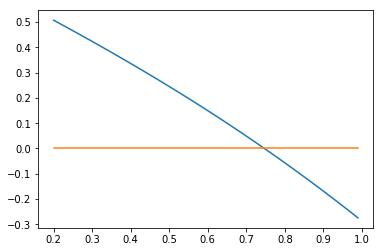

In [3]:
x = np.arange(0.2, 1, 0.01)
plt.plot(x, f(x), x, np.zeros(len(x)))
plt.show()

Сама функция реализующая алгоритм 

In [4]:
def bisect(f, a, b, eps):
    assert f(a) * f(b) < 0, 'f(a) * f(b) should be < 0'
    
    an = a
    bn = b
    while True:
        x0 = (an + bn) / 2
        
        if f(x0) == 0 or bn - an < 2 * eps:
            return x0
        
        if f(an) * f(x0) < 0:
            an = an
            bn = x0
        else:
            an = x0
            bn = bn

Вычисление корня $f(x)$

In [5]:
my_sol = bisect(f, 0.2, 1.0, 1e-6)
my_sol

0.7471107482910155

Вычисление корня $f(x)$ аналогичным методом из библиотеки scipy (для проверки моего решения)

In [8]:
scipy_sol = opt.root_scalar(f, bracket=[0.1, 1.0], method='bisect').root
scipy_sol

0.7471111956581811

Насколько сильно мое решение отличается от решения scipy 

In [9]:
scipy_sol - my_sol

4.473671655347289e-07